In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
train_abbr = pd.read_csv('../data/happiness_train_abbr.csv')
test_abbr = pd.read_csv('../data/happiness_test_abbr.csv')
# train_complete = pd.read_csv('../data/happiness_train_complete.csv')
# test_complete = pd.read_csv('../data/happiness_test_complete.csv')

In [3]:
train_abbr.info()
train_abbr.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
id                 8000 non-null int64
happiness          8000 non-null int64
survey_type        8000 non-null int64
province           8000 non-null int64
city               8000 non-null int64
county             8000 non-null int64
survey_time        8000 non-null object
gender             8000 non-null int64
birth              8000 non-null int64
nationality        8000 non-null int64
religion           8000 non-null int64
religion_freq      8000 non-null int64
edu                8000 non-null int64
income             8000 non-null int64
political          8000 non-null int64
floor_area         8000 non-null float64
height_cm          8000 non-null int64
weight_jin         8000 non-null int64
health             8000 non-null int64
health_problem     8000 non-null int64
depression         8000 non-null int64
hukou              8000 non-null int64
socialize          8000 non-null

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
4939,4940,4,2,29,83,126,2015/7/22 20:40,2,1941,1,1,1,1,8400,-8,90.0,148,90,1,2,3,1,2,2,1,4,5,4,NaN,NaN,NaN,NaN,15000.0,2,3,1,2,7,2,2,4,-8
6102,6103,4,1,11,29,52,2015/7/22 9:52,2,1980,1,1,1,4,0,1,12.0,155,120,3,4,4,1,2,2,1,4,2,1,3.0,1.0,2.0,3.0,-3.0,4,1,1,2,3,3,2,4,-8
6914,6915,5,1,24,70,110,2015/7/31 18:00,2,1957,1,1,1,6,21600,1,68.0,155,94,4,5,5,5,4,4,1,3,3,5,NaN,NaN,NaN,NaN,42600.0,2,3,1,2,3,2,1,3,3
4799,4800,4,1,5,8,24,2015/8/3 9:21,1,1997,1,1,1,6,-1,2,75.0,176,130,4,3,4,2,2,4,4,3,4,6,NaN,NaN,NaN,NaN,-3.0,3,3,1,1,1,2,2,3,-8
3052,3053,4,2,21,62,98,2015/7/16 17:28,1,1961,8,1,1,3,20000,1,230.0,162,110,2,4,3,1,4,4,1,4,2,4,NaN,NaN,NaN,NaN,20000.0,2,2,1,2,3,3,1,3,3
6916,6917,4,2,2,3,10,2015/7/26 17:07,1,1947,4,0,3,3,-1,1,200.0,170,110,2,3,3,1,2,2,1,3,7,4,NaN,NaN,NaN,NaN,-1.0,2,3,1,1,3,3,1,4,3
5439,5440,4,1,24,70,110,2015/7/30 8:51,1,1986,1,0,1,6,-3,1,110.0,175,120,4,5,5,5,3,3,2,2,5,1,2.0,5.0,1.0,2.0,-3.0,2,3,2,2,3,2,1,4,2
1254,1255,4,1,16,44,75,2015/7/27 9:23,2,1934,1,1,1,3,40000,1,90.0,158,120,4,4,3,2,2,4,2,3,5,4,NaN,NaN,NaN,NaN,70000.0,2,3,1,2,3,2,2,4,2
115,116,3,2,24,72,112,2015/8/3 19:34,2,1963,1,1,3,1,6000,1,120.0,150,85,3,4,4,1,4,4,1,2,4,3,NaN,NaN,NaN,NaN,-2.0,2,3,1,2,3,2,2,3,2
441,442,4,2,19,56,90,2015/7/16 17:34,1,1957,1,1,1,11,100000,4,280.0,170,143,5,3,5,4,5,1,3,3,8,1,3.0,35.0,1.0,2.0,200000.0,2,3,1,1,3,2,2,4,2


In [4]:
train_abbr.loc[train_abbr['work_status'].isnull()].sample(20)
#其中 工作一项有null值，所有以务农为业的人为null，非农业工作有值

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
7545,7546,4,2,22,66,105,2015/7/7 10:27,2,1941,1,1,1,3,19000,1,60.0,145,90,3,3,3,1,1,4,1,4,5,3,NaN,NaN,NaN,NaN,19000.0,2,3,1,2,3,3,1,4,2
328,329,3,2,9,22,44,2015/7/4 14:19,2,1992,1,1,1,4,-1,1,300.0,158,126,5,5,5,1,3,3,1,3,1,5,NaN,NaN,NaN,NaN,20000.0,4,2,1,2,3,3,3,3,3
2238,2239,4,2,21,62,98,2015/7/17 19:44,2,1972,1,1,1,3,-1,1,240.0,159,116,4,4,4,1,4,4,2,4,4,5,NaN,NaN,NaN,NaN,40000.0,2,3,2,1,3,2,2,3,2
2362,2363,3,1,15,40,71,2015/7/11 9:22,1,1934,1,1,1,4,4000,1,60.0,167,130,3,3,3,2,3,3,1,4,5,5,NaN,NaN,NaN,NaN,70000.0,4,2,2,1,7,2,2,4,1
1412,1413,4,2,18,52,86,2015/7/19 10:32,2,1953,1,1,1,1,-2,1,40.0,160,126,2,2,3,1,4,3,3,-8,4,6,NaN,NaN,NaN,NaN,-2.0,2,2,1,2,3,3,1,3,3
6029,6030,4,1,7,18,39,2015/8/10 20:52,2,1972,1,1,1,8,0,1,60.0,165,134,4,5,5,2,4,3,1,4,6,5,NaN,NaN,NaN,NaN,48000.0,2,3,1,2,3,2,2,4,2
2366,2367,4,1,17,49,82,2015/7/30 19:55,1,1954,1,1,1,7,20000,1,120.0,156,150,5,5,5,4,2,4,2,4,7,5,NaN,NaN,NaN,NaN,0.0,2,4,2,1,3,1,1,4,-8
5644,5645,4,1,19,57,91,2015/7/17 15:01,1,1940,1,1,1,4,60000,4,75.0,174,140,4,4,4,5,2,4,3,3,6,5,NaN,NaN,NaN,NaN,100000.0,2,3,1,2,3,2,2,4,2
5809,5810,4,1,16,46,77,2015/7/25 15:14,2,1997,1,1,1,4,1000,4,120.0,155,103,5,5,5,1,2,3,3,3,2,5,NaN,NaN,NaN,NaN,100000.0,6,2,1,2,1,3,1,4,2
4493,4494,4,1,1,1,8,2015/9/7 9:21,2,1990,1,1,1,10,0,1,125.0,172,118,5,5,5,2,1,3,4,4,6,5,NaN,NaN,NaN,NaN,78000.0,3,2,-3,2,1,2,2,3,-8


In [5]:
train_abbr.loc[train_abbr['family_income'].isnull()]

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
3129,3130,3,2,31,87,132,2015/8/16 12:38,2,1970,1,1,1,3,25000,1,90.0,160,90,2,5,3,1,4,3,1,1,1,3,NaN,NaN,NaN,NaN,NaN,4,1,1,2,3,2,1,2,3


In [6]:
#获取农村的、务农的人的家庭收入的平均数填入空值中
train_abbr.loc[(train_abbr['survey_type'] == 2 )& (train_abbr['work_exper'] == 3)&(train_abbr['family_income']>0)]['family_income'].mean()

39307.41739130435

In [7]:
train_abbr.loc[train_abbr['family_income'].isnull(),'family_income']\
      = train_abbr.loc[(train_abbr['survey_type'] == 2 )&
                       (train_abbr['work_exper'] == 3)&
                       (train_abbr['family_income']>0)]['family_income'].mean()

In [8]:
train_abbr_set = train_abbr.copy(deep=True)
train_abbr_set.dropna(axis=1,inplace=True)
target = train_abbr_set["happiness"]
train = train_abbr_set
#将调查时间类型转换为datetime类型
train['survey_time'] = pd.to_datetime(train['survey_time'],format='%Y/%m/%d')
#将调查时间设置为调查的年
train['survey_time'] = train['survey_time'].dt.year
#增加年龄特征，调查时间减去出生年
train['age'] = train['survey_time'] - train['birth']

In [9]:
#将年龄分层，高中以下16，高中16-18，大学19-23，入社会24-28,结婚生子29-35，中年危机35-40,壮年40-50,退休前50-60，退休>60
train.loc[train['age']<16, 'age']= 1
train.loc[(train['age']>=16) & (train['age']<19),'age'] = 2
train.loc[(train['age']>=19) & (train['age']<23),'age'] = 3
train.loc[(train['age']>=23) & (train['age']<29),'age'] = 4
train.loc[(train['age']>=29) & (train['age']<35),'age'] = 5
train.loc[(train['age']>=35) & (train['age']<40),'age'] = 6
train.loc[(train['age']>=40) & (train['age']<50),'age'] = 7
train.loc[(train['age']>=50) & (train['age']<60),'age'] = 8
train.loc[train['age']>=60,'age'] = 9

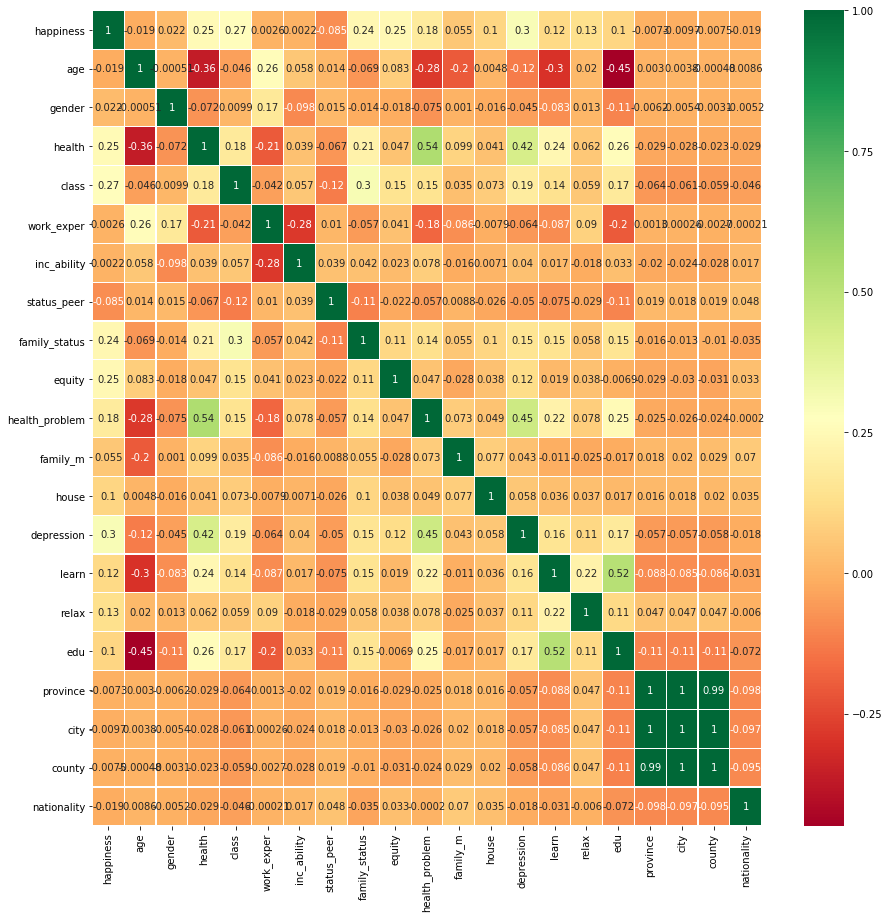

In [16]:
# colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(train[['happiness','age','gender','health','class','work_exper','inc_ability','status_peer','family_status','equity',
                   'health_problem','family_m','house','depression','learn','relax','edu','province','city','county','nationality',
                  ]].corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()